In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# df['Datetime'] = pd.to_datetime(df['Datetime'])
# df['Datetime'] = df['Datetime'].apply(lambda x: x.replace(year = 2007))

In [30]:
myhtm = pd.read_html(r"C:\Users\sebas\Documents\GitHub\ClimAIte\out\eplustbl.htm")
memory_csv = pd.read_csv(r"C:\Users\sebas\Documents\GitHub\ClimAIte\EMS_work\agent memory.csv")

6.75
['[', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '1', ',', ' ', '0', ']']
['0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '1', ',', ' ', '0', ']']
[9.0, 9.0, 5.0, 5.0, 5.0, 8.0, 2.0, 2.0, 4.0, 8.0, 3.0, 1.0, 1.0, 3.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 6.0, 10.0, 10.0, 10.0, 9.0, 4.0, 5.0, 5.0, 1.0, 9.0, 5.0, 2.0, 8.0, 5.0, 8.0, 1.0, 0.0, 0.0, 7.0, 7.0, 1.0, 10.0, 6.0, 3.0, 6.0, 3.0, 5.0, 2.0, 8.0, 1.0, 2.0, 2.0, 5.0, 5.0, 2.0, 5.0, 5.0, 1.0, 4.0, 5.0, 5.0, 1.0, 5.0, 10.0, 10.0, 5.0, 0.0, 5.0, 5.0, 9.0, 5.0, 5.0, 5.0, 9.0, 3.0, 10.0, 5.0, 8.0, 4.0, 10.0, 9.0, 9.0, 4.0, 5.0, 10.0, 2.0, 8.0, 10.0, 10.0, 10.0, 9.0, 5.0, 5.0, 6.0, 4.0, 5.0, 10.0, 10.0, 10.0, 10.0, 6.0, 10.0, 9.0, 10.0, 4.0, 10.0, 10.0, 10.0, 10.0, 5.0, 5.0, 10.0, 3.0, 10.0, 10.0, 10.0, 10.0, 10.0, 9.0, 10.0, 10.0, 10.0, 10.0, 5.0, 10.0, 10.0, 10.

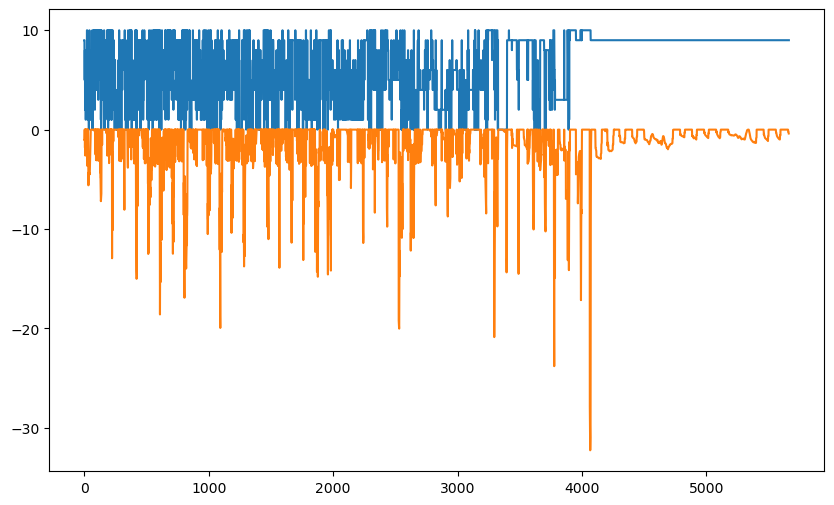

In [31]:
memory_csv.head()
print(list(memory_csv.at[1, 'action'])[1:].index('1') / 4)
print(list(memory_csv.at[1, 'action']))
print(list(memory_csv.at[1, 'action'])[1:])
# print([int(each) for each in list(memory_csv.at[1, 'action']) if int(each).dtype == int])
action_index = [list(memory_csv.at[x, 'action'])[1:].index('1') / 3 for x in range(memory_csv['action'].count())]
print(action_index)
rewards = memory_csv['next_reward'].convert_dtypes()

y2 = memory_csv['next_reward']
y1 = action_index
x = [x for x in range(len(y1))]

plt.figure(figsize=(10,6))
plt.plot(x,y1)
plt.plot(x,y2)

# plt.show()

In [32]:
# MJ_m2 = myhtm['Annual_Building_Utility_Performance_Summary_for_Entire_Facility']['Site and Source Energy'].iat[0,1]
MJ_m2 = myhtm[0][2][1]
EUI_kWh_m2 = float(MJ_m2) * 0.2777777 #conversion from MJ to kWh
print(MJ_m2)
print(EUI_kWh_m2)

23.41
6.502775957000001


# Agent Loss

In [33]:
lossdf = pd.read_csv(r"C:\Users\sebas\Documents\GitHub\ClimAIte\EMS_work\agent loss.csv")

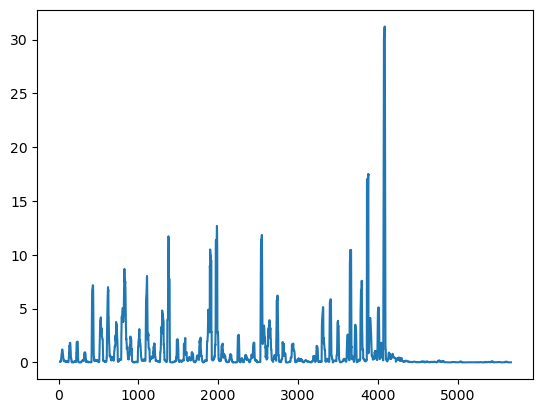

In [34]:
rollloss = lossdf['0'].rolling(20).mean().plot()
# rollloss.plot()
# rolling(702, min_periods=1, center=True).mean()

In [35]:
dfcsv = pd.read_csv(r"C:\Users\sebas\Documents\GitHub\ClimAIte\out\eplusout.csv", parse_dates=['Date/Time'])

In [49]:
dfcsv.columns

Index(['Date/Time',
       'Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)',
       'Z1_GROUND_FLOOR:Zone People Total Heating Energy [J](Hourly)',
       'Z2_FIRST_FLOOR:Zone People Total Heating Energy [J](Hourly)',
       'Z1_GROUND_FLOOR:Zone Lights Electricity Energy [J](Hourly)',
       'Z2_FIRST_FLOOR:Zone Lights Electricity Energy [J](Hourly)',
       'Z1_GROUND_FLOOR:Zone Electric Equipment Electricity Energy [J](Hourly)',
       'Z2_FIRST_FLOOR:Zone Electric Equipment Electricity Energy [J](Hourly)',
       'Z1_GROUND_FLOOR:Zone Mean Radiant Temperature [C](Hourly)',
       'Z2_FIRST_FLOOR:Zone Mean Radiant Temperature [C](Hourly)',
       'Solar Enclosure 1:Zone Windows Total Transmitted Solar Radiation Energy [J](Hourly)',
       'Z1_GROUND_FLOOR:Zone Mean Air Temperature [C](Hourly)',
       'Z1_GROUND_FLOOR:Zone Operative Temperature [C](Hourly)',
       'Z2_FIRST_FLOOR:Zone Mean Air Temperature [C](Hourly)',
       'Z2_FIRST_FLOOR:Zone Operative Temperatu

<Axes: >

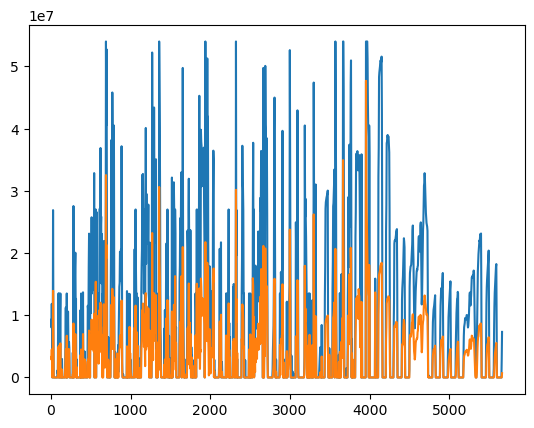

In [58]:
# dfcsv['Z1_GROUND_FLOOR IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Supply Air Total Heating Energy [J](Hourly)'].dropna().plot()
dfcsv['Z1_GROUND_FLOOR IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Zone Total Heating Energy [J](Hourly)'].dropna().plot()
dfcsv['Z2_FIRST_FLOOR IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Zone Total Heating Energy [J](Hourly)'].dropna().plot()
# newdf = dfcsv['Z1_GROUND_FLOOR IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Supply Air Total Heating Energy [J](Hourly)'].dropna() - dfcsv['Z1_GROUND_FLOOR IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Zone Total Heating Energy [J](Hourly)'].dropna()
# dfcsv['Whole Building:Facility Total Purchased Electricity Energy [J](Hourly)'].dropna().plot()
# newdf.plot()

# 'Z1_GROUND_FLOOR IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Supply Air Total Heating Energy [J](Hourly)'

# 'Z1_GROUND_FLOOR IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Zone Total Heating Energy [J](Hourly)'

In [37]:
import matplotlib.pyplot as plt

# x1 = [2,4,6,8]
# x2 = [3,5,7,9]
# x = [x for x in range(72)]
# y2 = output_df["DistrictHeating:Facility [J](TimeStep)"]
# y2=y4
# y2 = y2.rolling(702, min_periods=1, center=True).mean()

y1 = df["electricity_facility"]
y2 = df["electricity_heating"]
y2 = y2.rolling(24, min_periods=1, center=True).mean()
x = [x for x in range(y2.count())]

plt.figure(figsize=(10,6))
# plt.plot(x,y1)
plt.plot(x,y2)
# plt.plot(x,y3)
# plt.plot(x,y4)
# plt.plot(x, list(reversed(booleanlist_school_active)))

plt.show()

NameError: name 'df' is not defined